In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
url = 'http://books.toscrape.com/catalogue/page-1.html'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

# All books on the page
books = soup.find_all('article', class_='product_pod')

# Extract data
book_data = []
for book in books:
    title = book.h3.a['title']
    price = book.find('p', class_='price_color').text.strip()
    rating = book.p['class'][1]  # second class is the rating
    availability = book.find('p', class_='instock availability').text.strip()

    book_data.append([title, price, rating, availability])

# Convert to DataFrame
df = pd.DataFrame(book_data, columns=['Title', 'Price', 'Rating', 'Availability'])
df.head(10)

,Title,Price,Rating,Availability
0,A Light in the Attic,£51.77,Three,In stock
1,Tipping the Velvet,£53.74,One,In stock
2,Soumission,£50.10,One,In stock
3,Sharp Objects,£47.82,Four,In stock
4,Sapiens: A Brief History of Humankind,£54.23,Five,In stock
5,The Requiem Red,£22.65,One,In stock
6,The Dirty Little Secrets of Getting Your Dream...,£33.34,Four,In stock
7,The Coming Woman: A Novel Based on the Life of...,£17.93,Three,In stock
8,The Boys in the Boat: Nine Americans and Their...,£22.60,Four,In stock
9,The Black Maria,£52.15,One,In stock


In [6]:
all_books = []

for page in range(1, 51):
    url = f'http://books.toscrape.com/catalogue/page-{page}.html'
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    books = soup.find_all('article', class_='product_pod')

    for book in books:
        title = book.h3.a['title']
        price = book.find('p', class_='price_color').text.strip()
        rating = book.p['class'][1]
        availability = book.find('p', class_='instock availability').text.strip()

        all_books.append([title, price, rating, availability])

# Create DataFrame
df_all = pd.DataFrame(all_books, columns=['Title', 'Price', 'Rating', 'Availability'])
df_all.head()

,Title,Price,Rating,Availability
0,A Light in the Attic,£51.77,Three,In stock
1,Tipping the Velvet,£53.74,One,In stock
2,Soumission,£50.10,One,In stock
3,Sharp Objects,£47.82,Four,In stock
4,Sapiens: A Brief History of Humankind,£54.23,Five,In stock


In [7]:
print(f"Total number of books scraped: {len(df_all)}")

Total number of books scraped: 1000


In [8]:
# 1. Remove the £ symbol and convert 'Price' to float
df_all['Price'] = df_all['Price'].str.replace('£', '').astype(float)

In [9]:
# 2. Convert textual rating to numeric value
rating_map = {
    'One': 1,
    'Two': 2,
    'Three': 3,
    'Four': 4,
    'Five': 5
}
df_all['Rating'] = df_all['Rating'].map(rating_map)

In [10]:
# 3. Clean availability string to True/False
df_all['Availability'] = df_all['Availability'].apply(lambda x: 'In stock' in x)

In [11]:
# 4. Check for missing values
print(df_all.isnull().sum())

Title           0
Price           0
Rating          0
Availability    0
dtype: int64


In [12]:
# Show cleaned DataFrame
df_all.head()

,Title,Price,Rating,Availability
0,A Light in the Attic,51.77,3,True
1,Tipping the Velvet,53.74,1,True
2,Soumission,50.10,1,True
3,Sharp Objects,47.82,4,True
4,Sapiens: A Brief History of Humankind,54.23,5,True


In [13]:
avg_price = df_all['Price'].mean()
print(f"Average book price: £{avg_price:.2f}")

Average book price: £35.07


In [14]:
rating_counts = df_all['Rating'].value_counts().sort_index()
print("Number of books per rating:")
print(rating_counts)

Number of books per rating:
Rating
1    226
2    196
3    203
4    179
5    196
Name: count, dtype: int64


In [15]:
in_stock_avg = df_all[df_all['Availability'] == True]['Price'].mean()
out_stock_avg = df_all[df_all['Availability'] == False]['Price'].mean()

print(f"Average price (In stock): £{in_stock_avg:.2f}")
print(f"Average price (Out of stock): £{out_stock_avg:.2f}")

Average price (In stock): £35.07
Average price (Out of stock): £nan


In [16]:
top_expensive = df_all.sort_values(by='Price', ascending=False).head(5)
top_expensive

,Title,Price,Rating,Availability
648,The Perfect Play (Play by Play #1),59.99,3,True
617,Last One Home (New Beginnings #1),59.98,3,True
860,Civilization and Its Discontents,59.95,2,True
560,The Barefoot Contessa Cookbook,59.92,5,True
366,The Diary of a Young Girl,59.90,3,True


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style='whitegrid')

<ipython-input-19-eb980648bdaa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=df_all, palette='muted')


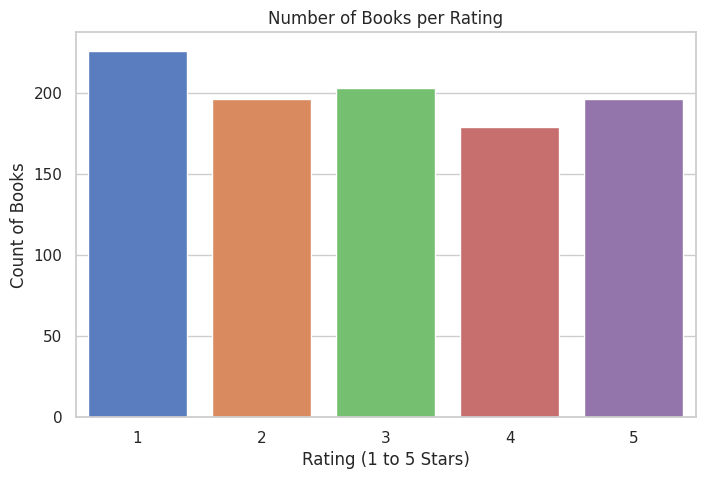

In [19]:
plt.figure(figsize=(8,5))
sns.countplot(x='Rating', data=df_all, palette='muted')
plt.title('Number of Books per Rating')
plt.xlabel('Rating (1 to 5 Stars)')
plt.ylabel('Count of Books')
plt.show()

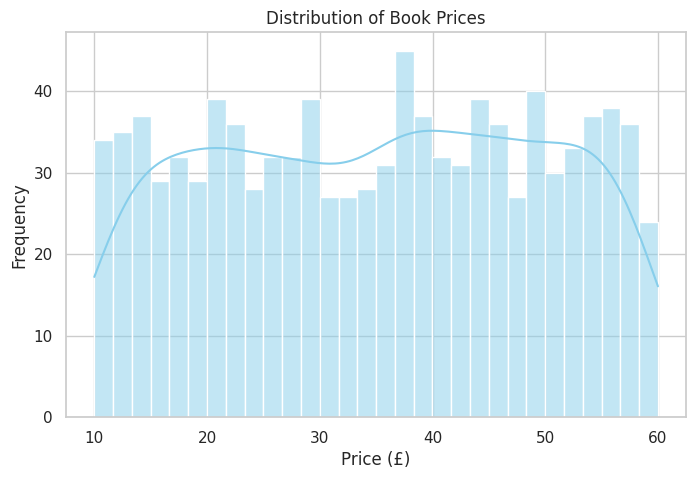

In [20]:
plt.figure(figsize=(8,5))
sns.histplot(df_all['Price'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Book Prices')
plt.xlabel('Price (£)')
plt.ylabel('Frequency')
plt.show()

<ipython-input-21-60a2e8a26057>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Rating', y='Price', data=df_all, palette='pastel')


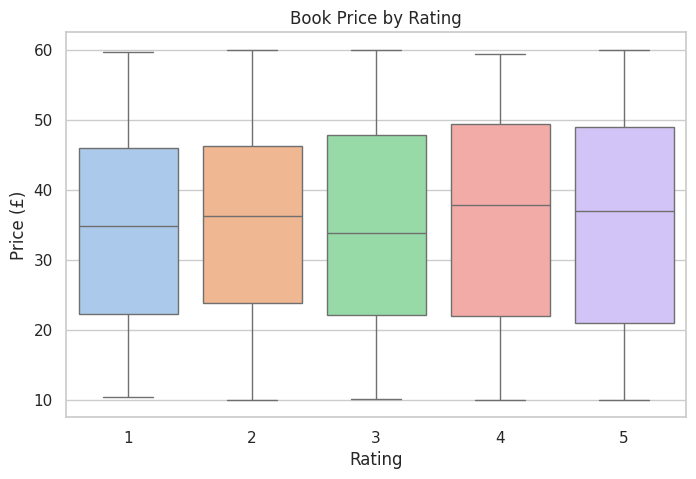

In [21]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Rating', y='Price', data=df_all, palette='pastel')
plt.title('Book Price by Rating')
plt.xlabel('Rating')
plt.ylabel('Price (£)')
plt.show()

**What went well:**
The project was a great opportunity to apply end-to-end data skills — from web scraping with BeautifulSoup to data cleaning and analysis in pandas. Scraping books.toscrape.com was smooth due to its clean HTML and consistent page structure. The data visualizations helped me quickly see trends in ratings and pricing.


**What was challenging:**
The most notable challenge was that all books were listed as "In stock," which made it hard to analyze stock-based pricing differences. Additionally, cleaning up the price and rating fields required careful string handling and mapping.


**What I would improve:**
If I expanded the project, I would scrape additional details like book category, review count, or product page links. I’d also explore building a small dashboard with Plotly or integrating the scraper into a Flask app for real-time exploration.